In [102]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
api_key = 'd6f98a8744e0460e9b17e0ee13a1672a'
city_name = 'New York'  # Example city
url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric'
df = pd.read_csv('C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/AQI and Lat Long of Countries.csv')
response = requests.get(url)
data = response.json()

In [82]:
print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0    

In [83]:
unique_coords = set()  # To store unique latitude and longitude pairs
count = 0  # Counter for limiting to 100 unique data points

# Iterate through the DataFrame and fetch unique latitude and longitude
for index, row in df.iterrows():
    if count >= 1000:
        break  # Limit to 100 unique data points

    # Fetch latitude and longitude from the DataFrame
    latitude = row['lat']  # Replace 'Latitude' with the actual column name in your CSV file
    longitude = row['lng']  # Replace 'Longitude' with the actual column name in your CSV file

    # Check if the pair is unique
    coord = (latitude, longitude)
    if coord not in unique_coords:
        unique_coords.add(coord)
        count += 1

print("First 1000 unique Latitude and Longitude pairs:")
print(unique_coords)

First 1000 unique Latitude and Longitude pairs:
{(38.6886, -104.6829), (39.1552, -76.5537), (33.3114, -86.7573), (13.0, 15.7333), (52.2282, -2.7385), (38.8602, -86.4895), (25.55, 82.1), (26.3638, 84.364), (52.2167, 6.9), (-7.9286, -14.4119), (35.2236, 137.0842), (51.9333, 43.5), (24.42, 87.34), (38.2014, 37.1883), (-34.6333, -60.4667), (42.2489, -83.1399), (20.2833, -102.5667), (35.6379, 139.5046), (44.1833, 12.1333), (-3.25, 29.6), (39.445, -75.7183), (-40.6219, 175.2867), (5.0833, -73.3667), (51.1081, 10.6467), (42.4333, -123.3317), (40.449, -75.3362), (50.701, -1.2883), (42.1394, -83.1929), (16.073, 102.7362), (38.8597, -104.6995), (7.5783, 123.1659), (53.5224, -7.3378), (51.25, 22.5667), (42.9253, -88.8442), (44.6242, -124.0513), (45.1929, 11.3115), (42.6229, 126.2614), (14.1, 120.9333), (20.8794, -103.8356), (55.8625, -4.0266), (51.3992, 7.1858), (40.5849, 9.0033), (50.2569, 31.7817), (37.8808, -122.179), (32.8464, -97.135), (38.7931, -90.3899), (-22.7322, -64.3425), (53.9169, -12

In [84]:
url = 'http://api.openweathermap.org/data/2.5/weather'

weather_data = []  # To store the retrieved weather data

# Fetch weather data for each unique latitude and longitude
for lat, lon in unique_coords:
    payload = {'lat': lat, 'lon': lon, 'appid': api_key, 'units': 'metric'}
    response = requests.get(url, params=payload)

    if response.status_code == 200:
        data = response.json()
        weather_data.append({
            'Latitude': latitude,
            'Longitude': longitude,
            'City': [data['name']],
            'Temperature': [data['main']['temp']],
            'Feels Like': [data['main']['feels_like']],
            'Humidity': [data['main']['humidity']],
            'Pressure': [data['main']['pressure']],
            'Wind Speed': [data['wind']['speed']],
            'Weather Description': [data['weather'][0]['description']],
            'Visibility': [data.get('visibility', 'N/A')],
            'Sunrise': [pd.to_datetime(data['sys']['sunrise'], unit='s')],
            'Sunset': [pd.to_datetime(data['sys']['sunset'], unit='s')]
        })
    else:
        print(f"Failed to fetch weather data for Latitude: {lat}, Longitude: {lon}")

# Create a DataFrame from the collected weather data
unique_weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
print(unique_weather_df)

     Latitude  Longitude                      City Temperature Feels Like  \
0        45.8    13.5333                [Fountain]     [17.73]    [16.26]   
1        45.8    13.5333             [Green Haven]     [20.72]    [19.92]   
2        45.8    13.5333  [Indian Springs Village]     [21.65]    [20.89]   
3        45.8    13.5333               [Massakory]     [33.32]    [30.97]   
4        45.8    13.5333              [Leominster]      [9.39]     [9.13]   
..        ...        ...                       ...         ...        ...   
995      45.8    13.5333                  [Szeged]     [13.91]    [13.34]   
996      45.8    13.5333                 [Lubango]     [23.01]    [23.04]   
997      45.8    13.5333                [Radomsko]      [9.61]     [6.51]   
998      45.8    13.5333                 [Litovel]      [9.38]     [6.72]   
999      45.8    13.5333                  [Dumjor]     [25.97]    [25.97]   

    Humidity Pressure Wind Speed Weather Description Visibility  \
0       

In [90]:
url = 'http://api.openweathermap.org/data/2.5/weather'

weather_data = []  # To store the retrieved weather data

# Fetch weather data for the first 1000 latitude and longitude pairs
for index in range(1000):
    lat = df.at[index, 'lat']  # Adjust column names accordingly
    lon = df.at[index, 'lng']  # Adjust column names accordingly

    payload = {'lat': lat, 'lon': lon, 'appid': api_key, 'units': 'metric'}
    response = requests.get(url, params=payload)

    if response.status_code == 200:
        data = response.json()
        weather_data.append({
            'City': [data['name']],
            'Temperature': [data['main']['temp']],
            'Feels Like': [data['main']['feels_like']],
            'Humidity': [data['main']['humidity']],
            'Pressure': [data['main']['pressure']],
            'Wind Speed': [data['wind']['speed']],
            'Weather Description': [data['weather'][0]['description']],
            'Visibility': [data.get('visibility', 'N/A')],
            'Sunrise': [pd.to_datetime(data['sys']['sunrise'], unit='s')],
            'Sunset': [pd.to_datetime(data['sys']['sunset'], unit='s')]
        })
    else:
        print(f"Failed to fetch weather data for Latitude: {lat}, Longitude: {lon}")

# Create a DataFrame from the collected weather data
first_weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
print(first_weather_df)

                    City Temperature Feels Like Humidity Pressure Wind Speed  \
0           [Praskoveya]      [13.3]    [12.15]     [56]   [1014]     [3.49]   
1     [Presidente Dutra]     [34.84]    [36.63]     [39]   [1006]     [2.02]   
2                [Irecê]     [32.29]    [32.52]     [39]   [1007]        [3]   
3      [Priolo Gargallo]     [22.75]    [22.57]     [57]   [1011]     [7.14]   
4            [Przasnysz]      [6.89]     [4.36]     [95]    [987]     [3.67]   
..                   ...         ...        ...      ...      ...        ...   
995            [Mogocha]    [-14.52]   [-14.52]     [54]   [1032]     [0.42]   
996            [Moncada]     [24.42]    [25.29]     [91]   [1012]     [1.88]   
997  [Montcada i Reixac]     [18.11]    [17.18]     [46]   [1008]     [5.14]   
998            [Moncada]     [18.84]    [17.85]     [41]   [1010]     [7.72]   
999         [Monfalcone]     [14.77]    [14.44]     [82]    [997]     [3.58]   

    Weather Description Visibility     

Removing Square brackets from all columns to increase readability. 

In [95]:
# Remove square brackets from all columns
first_weather_df = first_weather_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

# Now, if you attempt to access and print the DataFrame, it should display the cleaned data
print(first_weather_df.head())

               City  Temperature  Feels Like  Humidity  Pressure  Wind Speed  \
0        Praskoveya        13.30       12.15        56      1014        3.49   
1  Presidente Dutra        34.84       36.63        39      1006        2.02   
2             Irecê        32.29       32.52        39      1007        3.00   
3   Priolo Gargallo        22.75       22.57        57      1011        7.14   
4         Przasnysz         6.89        4.36        95       987        3.67   

  Weather Description  Visibility             Sunrise              Sunset  
0     overcast clouds       10000 2023-11-05 03:45:43 2023-11-05 13:47:46  
1    scattered clouds       10000 2023-11-05 08:32:08 2023-11-05 20:50:55  
2     overcast clouds       10000 2023-11-05 08:15:11 2023-11-05 20:47:50  
3           clear sky       10000 2023-11-05 05:27:11 2023-11-05 15:58:28  
4          light rain       10000 2023-11-05 05:40:42 2023-11-05 14:59:21  


Converting columns to make them easier to work with. 

In [98]:
# Convert temperature-related columns to numeric types
temperature_cols = ['Temperature', 'Feels Like']
first_weather_df[temperature_cols] = first_weather_df[temperature_cols].astype(float)

# Convert Sunrise and Sunset columns to datetime objects
date_cols = ['Sunrise', 'Sunset']
first_weather_df[date_cols] = first_weather_df[date_cols].apply(pd.to_datetime)

print(first_weather_df.head())

               City  Temperature  Feels Like  Humidity  Pressure  Wind Speed  \
0        Praskoveya        13.30       12.15        56      1014        3.49   
1  Presidente Dutra        34.84       36.63        39      1006        2.02   
2             Irecê        32.29       32.52        39      1007        3.00   
3   Priolo Gargallo        22.75       22.57        57      1011        7.14   
4         Przasnysz         6.89        4.36        95       987        3.67   

  Weather Description  Visibility             Sunrise              Sunset  
0     overcast clouds       10000 2023-11-05 03:45:43 2023-11-05 13:47:46  
1    scattered clouds       10000 2023-11-05 08:32:08 2023-11-05 20:50:55  
2     overcast clouds       10000 2023-11-05 08:15:11 2023-11-05 20:47:50  
3           clear sky       10000 2023-11-05 05:27:11 2023-11-05 15:58:28  
4          light rain       10000 2023-11-05 05:40:42 2023-11-05 14:59:21  


Checking for missing values.

In [100]:
missing_values = first_weather_df.isnull().sum()

Checking for Outliers that can skew the data.

       Temperature  Feels Like     Humidity     Pressure   Wind Speed  \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean     17.274160    16.74989    67.139000  1008.161000     3.611770   
std       8.438804     9.66731    21.400319    12.536916     2.431985   
min     -14.520000   -17.76000     1.000000   950.000000     0.000000   
25%      10.700000     9.95000    51.000000  1001.000000     1.790000   
50%      16.605000    15.75000    72.000000  1012.000000     3.090000   
75%      23.700000    23.46750    85.000000  1016.000000     5.140000   
max      42.530000    43.61000   100.000000  1035.000000    15.430000   

         Visibility  
count   1000.000000  
mean    9749.334000  
std     1268.207071  
min      177.000000  
25%    10000.000000  
50%    10000.000000  
75%    10000.000000  
max    10000.000000  


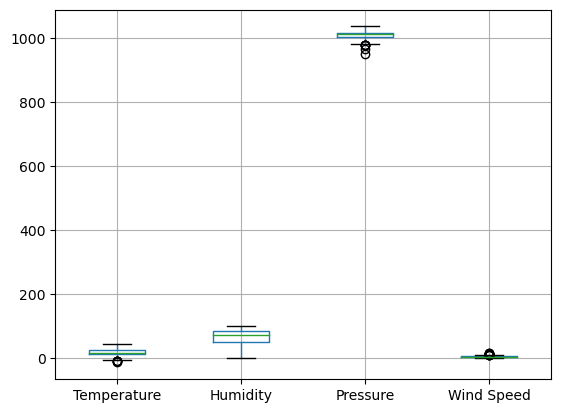

In [103]:
# Use statistical summary to identify outliers in numerical columns
print(first_weather_df.describe())

# Visualize potential outliers using boxplots or histograms
first_weather_df.boxplot(column=['Temperature', 'Humidity', 'Pressure', 'Wind Speed'])
plt.show()

Checking for duplicates.

In [108]:
# Check for and remove duplicates
first_weather_df.drop_duplicates(inplace=True)

print(first_weather_df)

                  City  Temperature  Feels Like  Humidity  Pressure  \
0           Praskoveya        13.30       12.15        56      1014   
1     Presidente Dutra        34.84       36.63        39      1006   
2                Irecê        32.29       32.52        39      1007   
3      Priolo Gargallo        22.75       22.57        57      1011   
4            Przasnysz         6.89        4.36        95       987   
..                 ...          ...         ...       ...       ...   
995            Mogocha       -14.52      -14.52        54      1032   
996            Moncada        24.42       25.29        91      1012   
997  Montcada i Reixac        18.11       17.18        46      1008   
998            Moncada        18.84       17.85        41      1010   
999         Monfalcone        14.77       14.44        82       997   

     Wind Speed Weather Description  Visibility             Sunrise  \
0          3.49     overcast clouds       10000 2023-11-05 03:45:43   
1    

When engaging in data wrangling with sources such as OpenWeatherMap, ethical considerations arise at various stages of the process. Extracting, transforming, and loading data could potentially reveal insights about specific locations, climates, or population behaviors. Ethical concerns may arise regarding the collection and use of location-specific weather data, potentially impacting personal privacy. Furthermore, the dissemination and sharing of weather data should ensure responsible handling to avoid misinterpretation or misrepresentation. The process of identifying outliers and cleansing the dataset could inadvertently filter out essential information or bias the dataset, which might affect weather predictions or climate-related decisions. Proper disclosure and transparency regarding data sources, manipulation techniques, and potential limitations are crucial to ensure informed and ethical data utilization. It is essential to consider the implications of data wrangling in terms of privacy, accuracy, and bias to maintain ethical standards when working with weather data.